In [1]:
import pandas as pd
from nilearn import plotting
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
df = pd.read_csv('mni_coordinates_all_subs.csv')

In [3]:
df['subject'].value_counts()

subject
BJH046     229
BJH021     226
BJH017     218
BJH016     218
BJH027     214
BJH029     190
SLCH002    186
BJH051     181
BJH050     172
BJH039     156
BJH025     156
BJH026     150
SLCH018    126
LL14       122
BJH041     116
LL13        88
LL12        86
LL10        74
LL19        74
LL17        72
Name: count, dtype: int64

In [4]:
def plot_on_brain(df, subject, title, save=False):
    """
    Plot the coordinates on the brain.
    """
    df = df[df['subject'] == subject]
    coords = df[['x', 'y', 'z']].values
    plt.figure(figsize=(10, 10))
    plotting.plot_connectome(np.eye(len(coords)), coords, node_size=10, node_color='red', edge_kwargs={'alpha': 0.5})
    plt.title(title)
    if save:
        plt.savefig(f'{subject}.png')
    plt.show()
    

In [5]:
with open('/home/brooke/pacman/preprocessing/scripts/roi.py') as file:
    exec(file.read())

In [6]:
# Inverting the ROIs dictionary to map subjects and electrodes to regions
subject_electrode_to_region = {}
for subject, regions in ROIs.items():
    for region, electrodes in regions.items():
        for electrode in electrodes:
            subject_electrode_to_region[(subject, electrode)] = region

# Function to apply to each row
def map_electrode_to_region(row):
    return subject_electrode_to_region.get((row['subject'], row['Electrode']), 'Unknown')

# Creating the new 'region' column
df['region'] = df.apply(map_electrode_to_region, axis=1)

# filter out unknow #
df = df[df['region'] == "mfg"]

In [7]:
pd.options.display.max_rows = 250

In [8]:
df['region'].value_counts()

region
mfg    129
Name: count, dtype: int64

In [22]:
# df.to_csv('mni_coordinates_all_subs_with_detailed_regions.csv', index=False)

In [9]:
# Load the .nii file
nii_file_path = 'AAL.nii'
nii_img = nib.load(nii_file_path)
brain_data = nii_img.get_fdata()


# Threshold the dlpfc data to get a binary mask
dlpfc_mask = (brain_data == 2201) | (brain_data == 2202)

# Get the voxel coordinates of the hippocampus
dlpfc_voxel_coords = np.column_stack(np.where(dlpfc_mask))

# Convert voxel coordinates to MNI coordinates
affine = nii_img.affine
dlpfc_mni_coords = nib.affines.apply_affine(affine, dlpfc_voxel_coords)



In [10]:
# if subject is in effect list, mark yes, else no
effect_df = pd.read_csv('sig_electrodes_ci_mfg_attack_diff.csv')
effect_df['Electrode'] = effect_df['first_elec']
# merge with df
df = df.merge(effect_df, on=['subject', 'Electrode'], how='left')
df = df[~df['big_attack_effect'].isnull()]
df

,subject,X,Y,Z,Electrode,region,subject_elec_id,mean,lower,upper,significant,electrode,first_elec,second_elec,big_attack_effect
0,BJH021,-35.440436,26.283543,26.195695,L11,mfg,BJH021_BJH021_L11-L12,0.051082,-0.110602,0.220613,False,L11-L12,L11,L12,no
1,BJH021,-39.008591,27.141332,26.414897,L12,mfg,BJH021_BJH021_L12-L13,0.031315,-0.139925,0.195039,False,L12-L13,L12,L13,no
2,BJH021,-42.547449,28.367501,27.079729,L13,mfg,BJH021_BJH021_L13-L14,0.081664,-0.079030,0.249882,False,L13-L14,L13,L14,no
4,BJH021,-36.398105,32.432483,13.325872,N12,mfg,BJH021_BJH021_N12-N13,0.097447,-0.064701,0.264950,False,N12-N13,N12,N13,no
5,BJH021,-37.092125,35.295314,16.761297,N13,mfg,BJH021_BJH021_N13-N14,0.075262,-0.084574,0.241281,False,N13-N14,N13,N14,no
6,BJH021,-37.804718,38.285389,20.366399,N14,mfg,BJH021_BJH021_N14-N15,0.033110,-0.135841,0.190933,False,N14-N15,N14,N15,no
7,BJH021,-38.582622,41.089676,23.619770,N15,mfg,BJH021_BJH021_N15-N16,0.059216,-0.103956,0.223244,False,N15-N16,N15,N16,no
9,BJH025,42.743722,30.602943,15.434756,C13,mfg,BJH025_BJH025_C13-C14,0.111360,-0.110439,0.340606,False,C13-C14,C13,C14,no
10,BJH025,43.894859,33.232623,18.263600,C14,mfg,BJH025_BJH025_C14-C15,0.097107,-0.122485,0.321186,False,C14-C15,C14,C15,no
11,BJH025,44.501573,35.661207,21.108348,C15,mfg,BJH025_BJH025_C15-C16,0.130247,-0.090431,0.357837,False,C15-C16,C15,C16,no


In [11]:
effect = df['big_attack_effect'].values

# Create a custom colormap if needed (e.g., based on the unique colors in your CSV)
unique_colors = np.unique(effect)
unique_colors

array(['no', 'yes'], dtype=object)

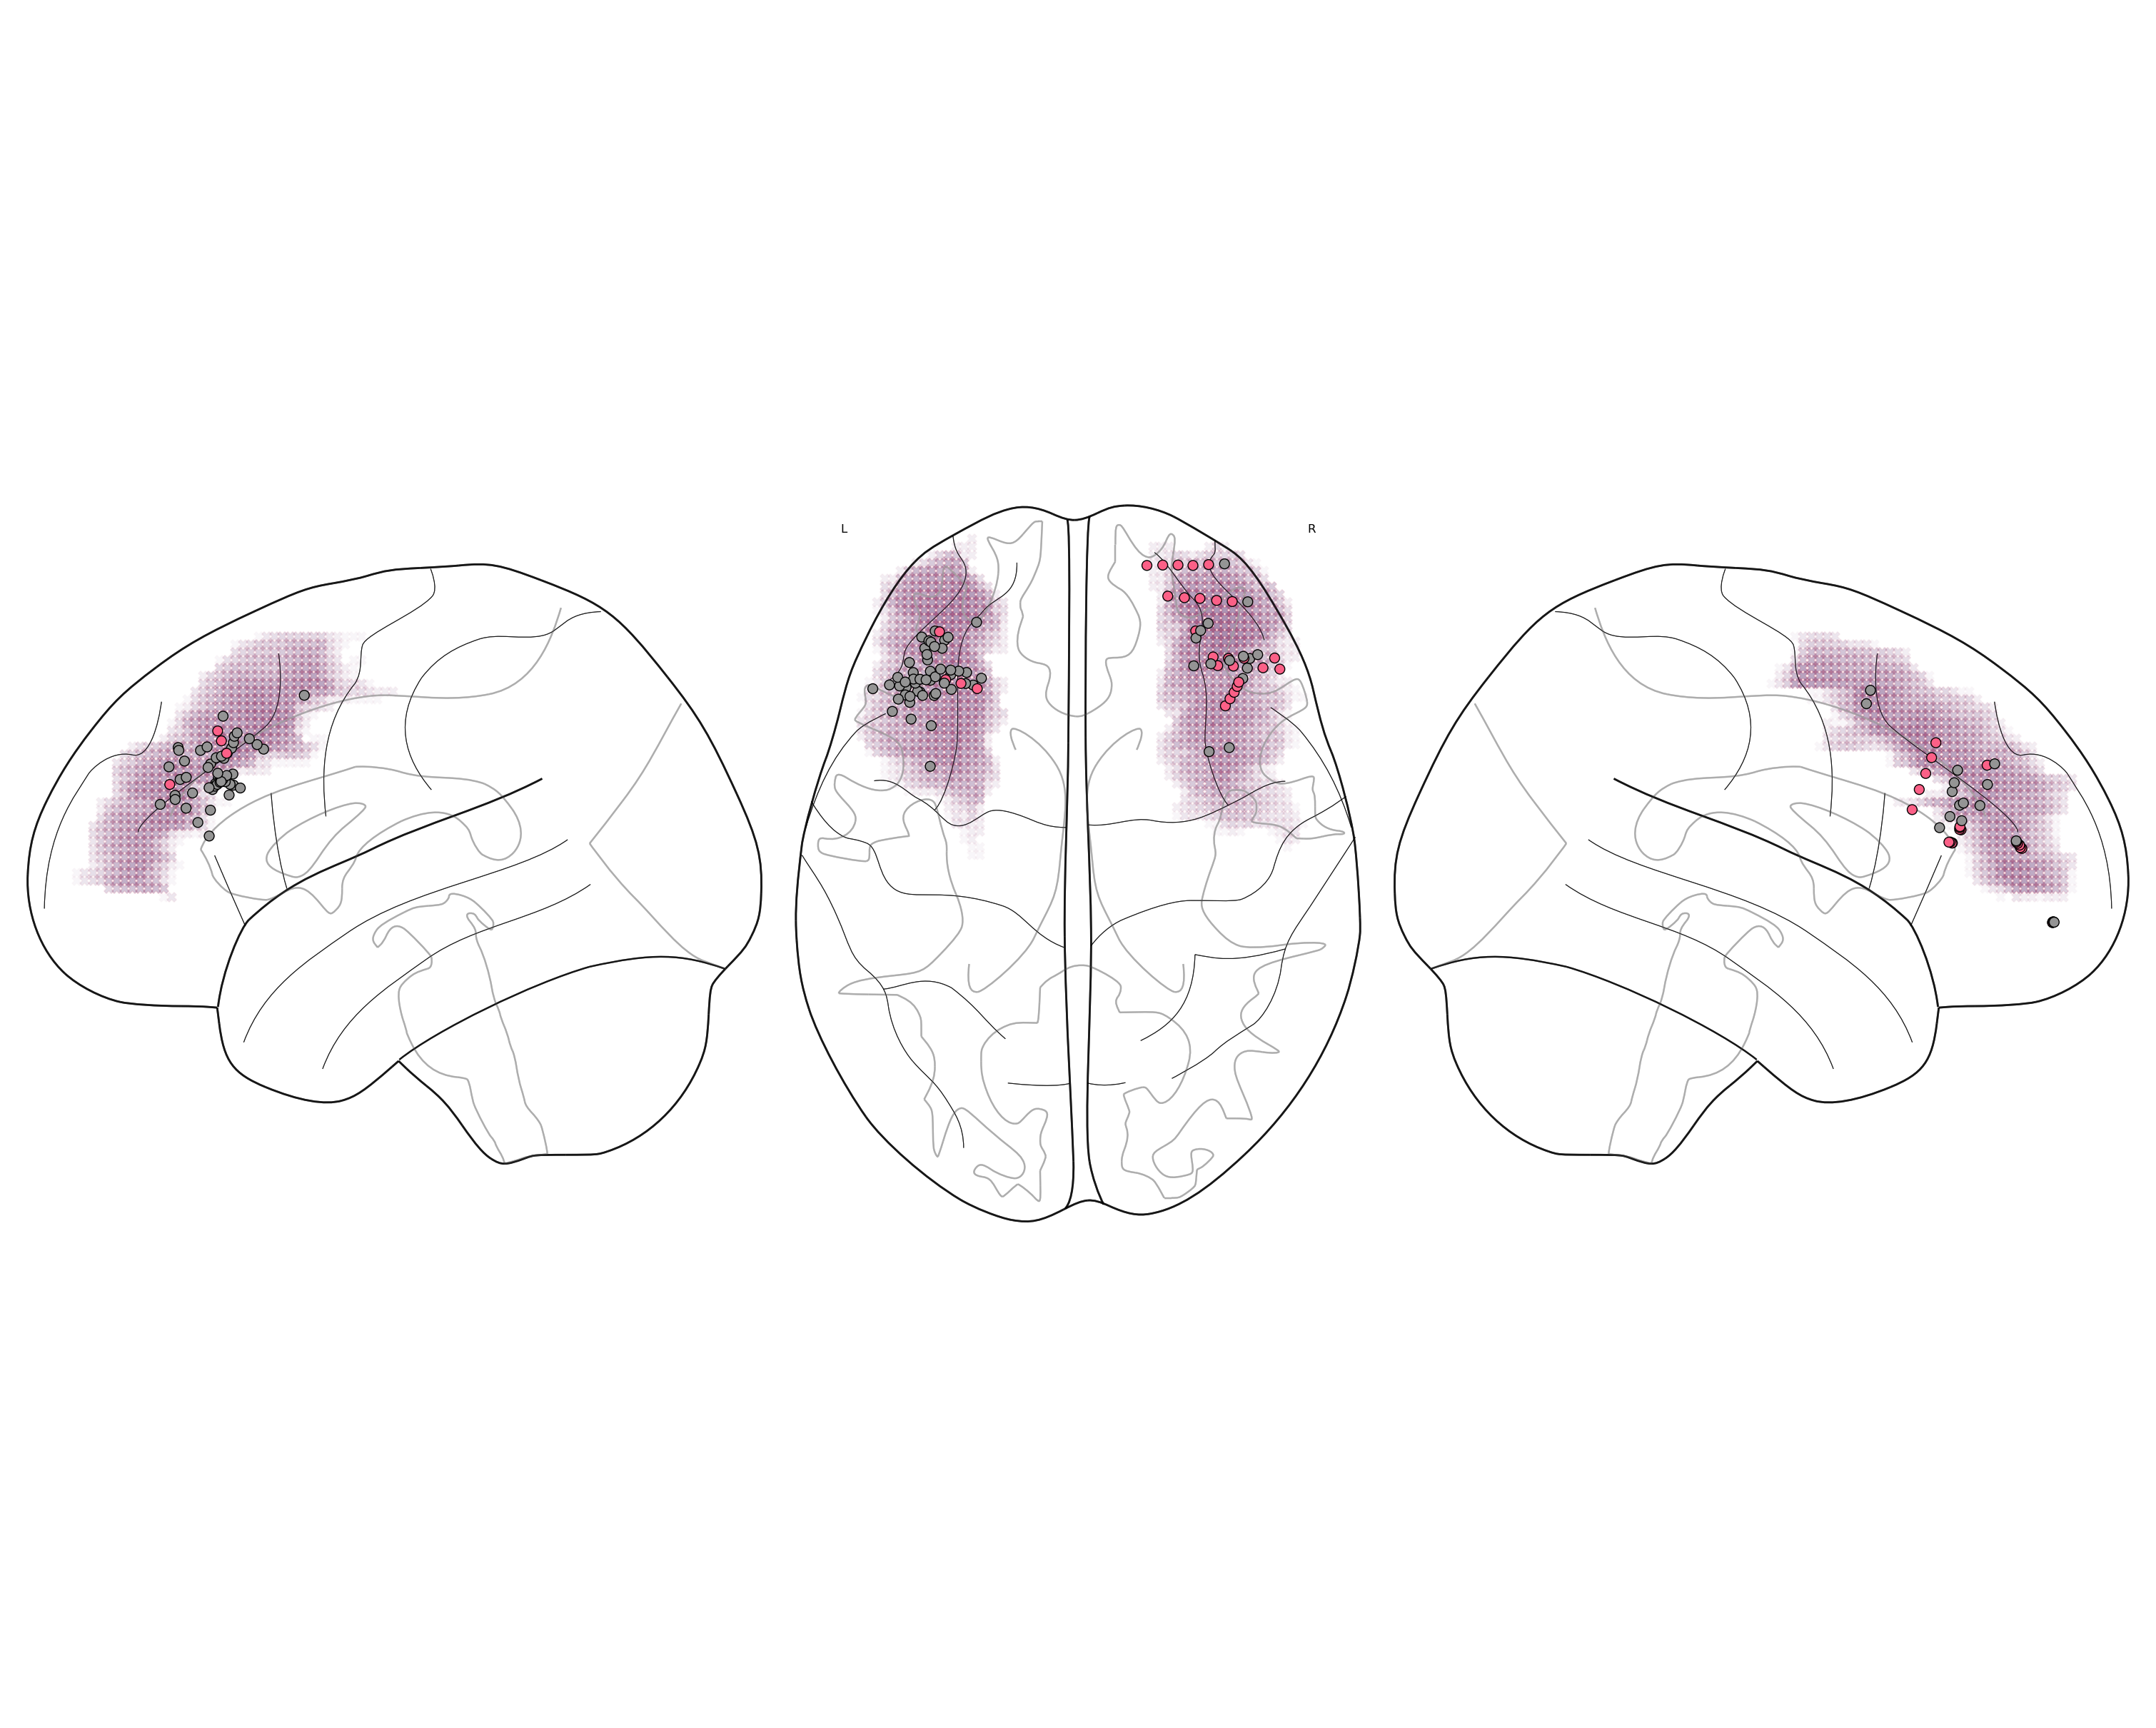

In [16]:
# %%ai

plt.rcParams['figure.figsize'] = [30, 24] 
fig = plt.figure(figsize=(30, 24))

# Extract coordinates and colors from the dataframe
coordinates = df[['X', 'Y', 'Z']].values
effect = df['big_attack_effect'].values

# Create a custom colormap if needed (e.g., based on the unique colors in your CSV)
unique_colors = np.unique(effect)
colors = [
    (0.58, 0.58, 0.58, 1), # grey
    (0.9843, 0.3765, 0.5294, 1), # blue

]

# Create a dictionary that maps each unique value in df['Origin'] to a unique color
color_map = {region: color for region, color in zip(df['big_attack_effect'].unique(), colors)}

# Create a new 'Color' column based on the 'Origin' column
df['Color'] = df['big_attack_effect'].map(color_map).values
region_colors = df['Color'].values

# Plot the brain with the coordinates
# Create an adjacency matrix with zeros (no connections)
adjacency_matrix = np.zeros((len(coordinates), len(coordinates)))
dlpfc_adjacency_matrix = np.zeros((len(dlpfc_mni_coords), len(dlpfc_mni_coords)))

# Plot the nodes without connections
plotting.plot_connectome(dlpfc_adjacency_matrix, dlpfc_mni_coords, node_color=[(0.5294118, 0.3803922, 0.5803922, .05)], node_size=100, node_kwargs = {'edgecolors':[(0.9843, 0.3765, 0.5294, .02)], 'marker':'X'}, display_mode='lzr', figure=fig)

plotting.plot_connectome(adjacency_matrix, coordinates, node_color=region_colors, node_size=100, node_kwargs = {'edgecolors':'black', 'marker':'o'},  display_mode='lzr', figure=fig)





In [17]:
fig.savefig('./mfg_effects_MNI_plot.png')

In [19]:
# df